<a href="https://colab.research.google.com/github/cboomus/SAT5114/blob/main/SAT5165_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# The purpose of this project is to predict spirometric values
# for a person based on the features of height, weight, age, sex
# ethnicity and race.

# Project dataset: Ibraheem DL, Samy B, Therkorn JH, Falvo MJ.
# Beyond the Expiratory Limb: A Complete Raw Spirometry Dataset.
# Front Physiol. 2022 May 23;13:898831.
# doi: 10.3389/fphys.2022.898831. PMID: 35677095; PMCID: PMC9168312.

# The code was generated with ChatGPT.

#GitHub link: https://github.com/cboomus/SAT5114/blob/main/SAT5165_Final_Project.ipynb

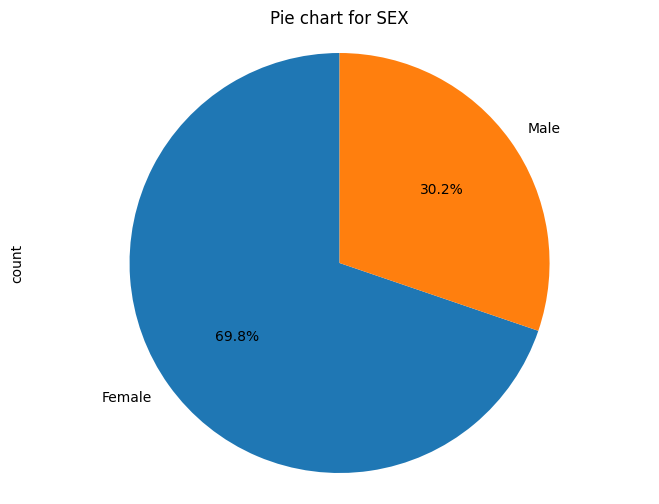

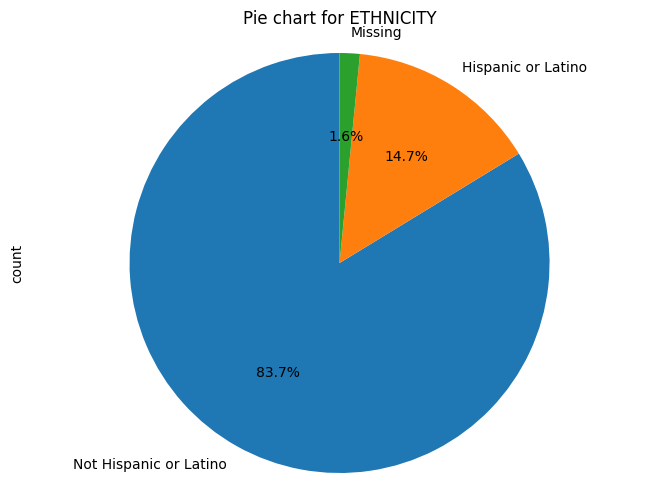

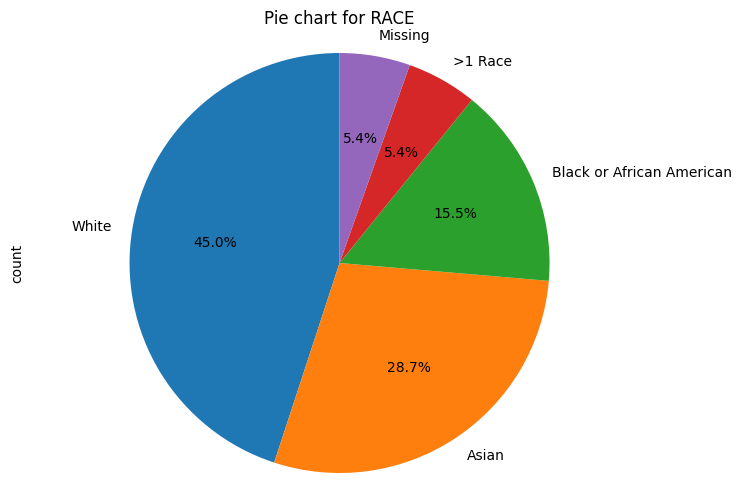

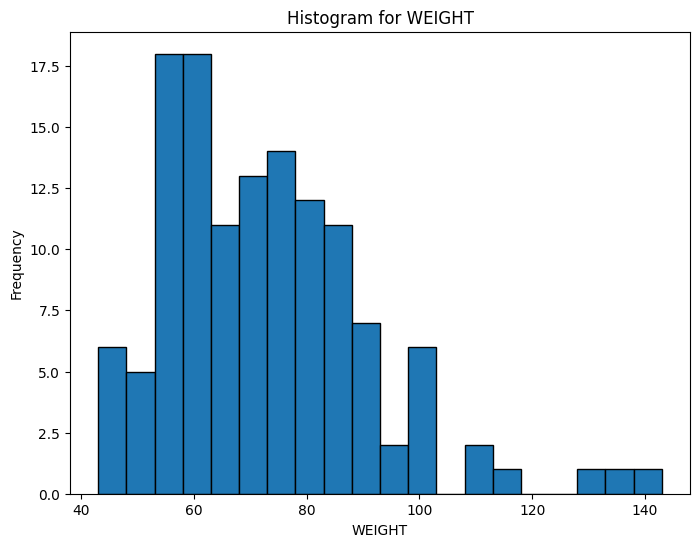

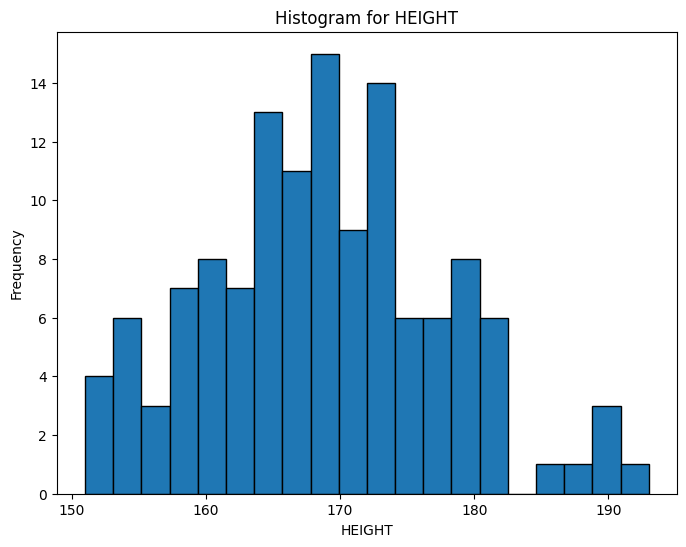

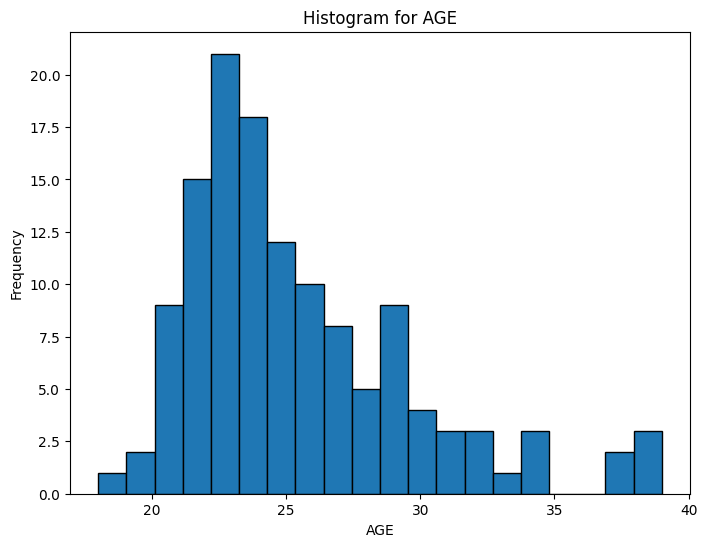

In [5]:
# This section displays the demographic categorical data in pie charts and
# numerical data in histogram charts

import matplotlib.pyplot as plt
import pandas as pd

# Specify the CSV file path
demographics_csv_path = '/content/drive/MyDrive/SAT5165_Final_Project/demographics_data.csv'

# Read the CSV file into a pandas DataFrame
demographics_df = pd.read_csv(demographics_csv_path)

# Pie charts for categorical columns
categorical_columns = ['SEX', 'ETHNICITY', 'RACE']

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    demographics_df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie chart for {column}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Histograms for numerical columns
numerical_columns = ['WEIGHT', 'HEIGHT', 'AGE']

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    demographics_df[column].plot.hist(bins=20, edgecolor='black')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [6]:
# This section calculates the skew for the data features weight, height, and age

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/SAT5165_Final_Project/demographics_data.csv')

# Calculate skewness for WEIGHT, HEIGHT, and AGE columns
skewness_weight = df['WEIGHT'].skew()
skewness_height = df['HEIGHT'].skew()
skewness_age = df['AGE'].skew()

print(f"Skewness for WEIGHT: {skewness_weight:.2f}")
print(f"Skewness for HEIGHT: {skewness_height:.2f}")
print(f"Skewness for AGE: {skewness_age:.2f}")

Skewness for WEIGHT: 1.14
Skewness for HEIGHT: 0.28
Skewness for AGE: 1.22


In [7]:
# This section converts the spirometric TXT file to a CSV file

# Input and output file names
input_file_name = '/content/drive/MyDrive/SAT5165_Final_Project/spirotidydatafinal.txt'
output_file_name = '/content/drive/MyDrive/SAT5165_Final_Project/spirotidydatafinal.csv'

# Define column labels
columns = ['ID', 'Visit', 'Trial', 'Time', 'Volume', 'Flow']

# Read data from txt file using pandas
df = pd.read_csv(input_file_name, names=columns, skiprows=1)

# Write data to csv file
df.to_csv(output_file_name, index=False)

In [8]:
# This section counts how many rows of data are present in the
# spirotidydatafinal.csv dataset and includes the first row containing labels

import csv

csv_file_path = '/content/drive/MyDrive/SAT5165_Final_Project/spirotidydatafinal.csv'

def count_rows(csv_path):
    with open(csv_path, 'r', newline='') as file:
        reader = csv.reader(file)
        row_count = sum(1 for row in reader)
    return row_count

# Get the number of rows in the CSV file
num_rows = count_rows(csv_file_path)

print(f"The CSV file has {num_rows} rows")

The CSV file has 2287214 rows


In [9]:
# This section counts the number of rows that contain NaN values,
# deletes them, and recounts the number of remaining rows

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Count the number of rows containing NaN values
num_nan_rows = df.isna().any(axis=1).sum()

# Drop rows containing NaN values
df = df.dropna()

# Count the number of rows after dropping NaN values
num_rows_after = len(df)

print(f"The CSV file has {num_nan_rows} rows containing NaN values")
print(f"{num_nan_rows} rows have been dropped")
print(f"Now, the CSV file has {num_rows_after} rows after dropping NaN values")

The CSV file has 1231977 rows containing NaN values
1231977 rows have been dropped
Now, the CSV file has 1055236 rows after dropping NaN values


In [10]:
# This section removes inspiratory values from the datafile

# Remove all rows where 'Flow' is negative
df = df[df['Flow'] >= 0]

# Write the cleaned data to the new output CSV file
df.to_csv(output_file_name, index=False)

# Count the number of rows after dropping inspiratory values from datafile
num_rows_after = len(df)

print(f"Now, the CSV file has {num_rows_after} rows after dropping inspiratory values")

Now, the CSV file has 756756 rows after dropping inspiratory values


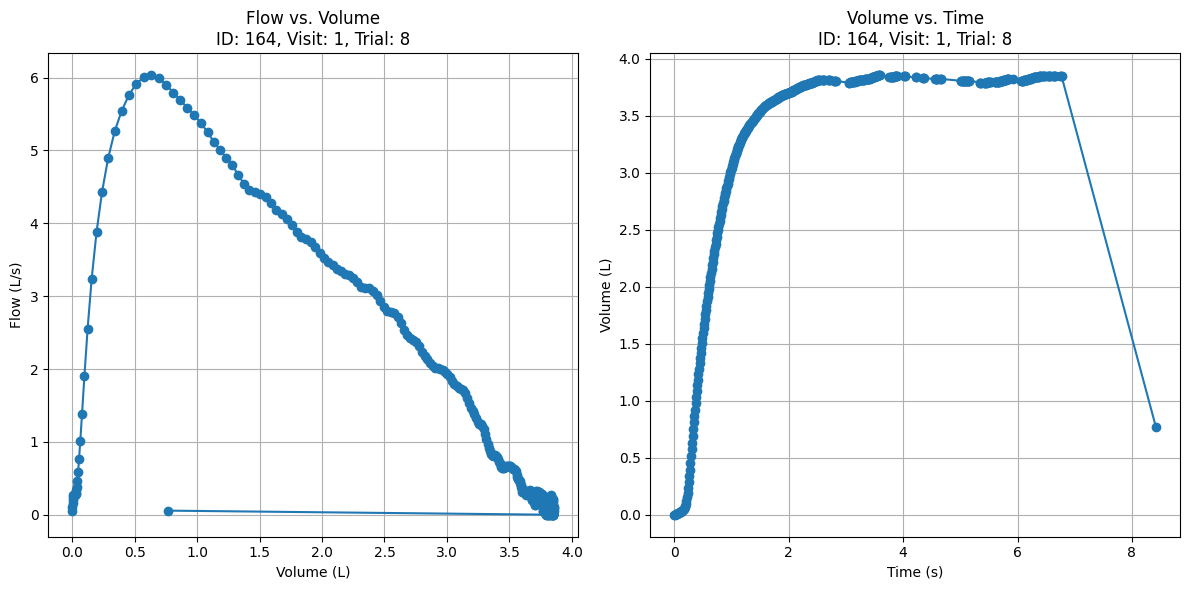

In [11]:
# This section plots one randomly chosen ID, visit, and trial to verify
# data appears as expected in two plots: flow-volume and volume-time

import numpy as np

# Randomly select an ID, Visit, and Trial
unique_ids = df['ID'].unique()
selected_id = np.random.choice(unique_ids)

unique_visits = df[df['ID'] == selected_id]['Visit'].unique()
selected_visit = np.random.choice(unique_visits)

unique_trials = df[(df['ID'] == selected_id) & (df['Visit'] == selected_visit)]['Trial'].unique()
selected_trial = np.random.choice(unique_trials)

# Filter the DataFrame
selected_df = df[(df['ID'] == selected_id) &
                 (df['Visit'] == selected_visit) &
                 (df['Trial'] == selected_trial)]

# Plotting Flow vs. Volume
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(selected_df['Volume'], selected_df['Flow'], marker='o', linestyle='-')
plt.title(f'Flow vs. Volume\nID: {selected_id}, Visit: {selected_visit}, Trial: {selected_trial}')
plt.xlabel('Volume (L)')
plt.ylabel('Flow (L/s)')
plt.grid(True)

# Plotting Volume vs. Time (Time in seconds)
plt.subplot(1, 2, 2)
plt.plot(selected_df['Time'] / 1000, selected_df['Volume'], marker='o', linestyle='-')
plt.title(f'Volume vs. Time\nID: {selected_id}, Visit: {selected_visit}, Trial: {selected_trial}')
plt.xlabel('Time (s)')
plt.ylabel('Volume (L)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# This section calculates the FVC, FEV1, and FEV1/FVC
# and stores the information in spiro_calculations.csv

# Convert 'Volume' and 'Flow' columns to numeric
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

# Ensure the data is sorted by ID, Visit, Trial, and Time
df.sort_values(by=['ID', 'Visit', 'Trial', 'Time'], inplace=True)

# Calculate FVC as the max volume for each group
df['FVC'] = df.groupby(['ID', 'Visit', 'Trial'])['Volume'].transform('max')

# Define a function to calculate FEV1 for each group
def calculate_FEV1(group):
    one_second_volume = group[group['Time'] <= 1000]['Volume'].max()
    return pd.Series({'FEV1': one_second_volume})

# Calculate FEV1 for each ID, Visit, and Trial, resulting in a DataFrame
fev1_df = df.groupby(['ID', 'Visit', 'Trial']).apply(calculate_FEV1).reset_index()

# Calculate FEV1/FVC directly in the fev1_df DataFrame using the already calculated FVC
fev1_df = fev1_df.merge(df[['ID', 'Visit', 'Trial', 'FVC']].drop_duplicates(), on=['ID', 'Visit', 'Trial'])
fev1_df['FEV1/FVC'] = fev1_df['FEV1'] / fev1_df['FVC']

# Save calculations to CSV file
fev1_df.to_csv('/content/drive/MyDrive/SAT5165_Final_Project/spiro_calculations.csv', index=False)

# Load the new CSV as the active DataFrame
df_active = pd.read_csv('/content/drive/MyDrive/SAT5165_Final_Project/spiro_calculations.csv')

# Display a random sample of 5 rows from the updated DataFrame
print(df_active.sample(5))

       ID  Visit  Trial    FEV1     FVC  FEV1/FVC
517   156      2      2  3.6045  4.4299  0.813675
820   189      2      6  2.0753  2.5553  0.812155
1168  227      2      5  2.3786  2.9959  0.793952
908   198      2      6  3.2475  5.4030  0.601055
415   143      1      2  3.7458  5.1089  0.733191


In [13]:
# This section merges the demographic file demographics_data.csv
# with the newly created file spiro_calculations.csv

# Load spiro_calculations.csv
max_values = pd.read_csv('/content/drive/MyDrive/SAT5165_Final_Project/spiro_calculations.csv')

# Load demographics_data.csv from the correct path
demographics_data = pd.read_csv('/content/drive/MyDrive/SAT5165_Final_Project/demographics_data.csv')

# Merge the two DataFrames on the 'ID' column
merged_data = pd.merge(max_values, demographics_data, on='ID')

# Rename columns to lowercase
merged_data = merged_data.rename(columns={
    'WEIGHT': 'Weight',
    'HEIGHT': 'Height',
    'SEX': 'Sex',
    'AGE': 'Age',
    'ETHNICITY': 'Ethnicity',
    'RACE': 'Race'
})

# Save the merged result to a new CSV file
merged_data.to_csv('/content/drive/MyDrive/SAT5165_Final_Project/merged_data.csv', index=False)

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/SAT5165_Final_Project/merged_data.csv')

print(df.sample(5))

       ID  Visit  Trial     FEV1     FVC  FEV1/FVC  Weight  Height     Sex  \
631   170      1      7  0.28571  3.0602  0.093363    87.0   167.0  Female   
1148  225      2      2  2.94430  3.5972  0.818498    53.0   159.0  Female   
687   176      2      3  2.09410  2.8018  0.747412    58.0   169.0  Female   
1118  222      2      5  2.42990  2.7907  0.870713    53.0   155.0  Female   
1001  210      1      1  3.21930  3.8684  0.832205    65.0   173.0  Female   

      Age               Ethnicity                       Race  
631    39  Not Hispanic or Latino  Black or African American  
1148   22  Not Hispanic or Latino                      White  
687    22  Not Hispanic or Latino                      Asian  
1118   27      Hispanic or Latino                    Missing  
1001   23  Not Hispanic or Latino                      White  


In [14]:
# This section processes the data to create binary data for
# the columns Sex, Ethnicity, and Race

# Load merged_data.csv
merged_data = pd.read_csv('/content/drive/MyDrive/SAT5165_Final_Project/merged_data.csv')

# Use get_dummies to one-hot encode 'Sex', 'Ethnicity', and 'Race'
merged_data_encoded = pd.get_dummies(merged_data, columns=['Sex', 'Ethnicity', 'Race'])

# Save the one-hot encoded result to a new CSV file
merged_data_encoded.to_csv('/content/drive/MyDrive/SAT5165_Final_Project/merged_data_encoded.csv', index=False)

print ('Data One-Hot Encoded')

# Load the CSV file
df = pd.read_csv('/content/drive/MyDrive/SAT5165_Final_Project/merged_data_encoded.csv')

print(df.sample(5))

Data One-Hot Encoded
      ID  Visit  Trial    FEV1     FVC  FEV1/FVC  Weight  Height  Age  \
27   102      2      8  3.8801  4.9832  0.778636    83.0   185.0   27   
440  146      2      2  2.3652  2.9388  0.804818    56.0   164.0   26   
225  123      1      8  2.6973  3.1744  0.849704    54.0   152.0   25   
329  133      1      8  2.9514  3.7858  0.779597    83.0   172.0   23   
214  121      2      2  2.3533  2.7474  0.856555    58.0   160.0   21   

     Sex_Female  Sex_Male  Ethnicity_Hispanic or Latino  Ethnicity_Missing  \
27        False      True                         False              False   
440        True     False                         False              False   
225        True     False                          True              False   
329       False      True                         False              False   
214        True     False                         False              False   

     Ethnicity_Not Hispanic or Latino  Race_>1 Race  Race_Asian  \
27  

In [15]:
# The section normalizes the features Weight, Height, and Age

from sklearn.preprocessing import MinMaxScaler

# Load the CSV file into a DataFrame
file_path = '/content/drive/MyDrive/SAT5165_Final_Project/merged_data_encoded.csv'
df = pd.read_csv(file_path)

# Extract the columns to normalize
columns_to_normalize = ['Weight', 'Height', 'Age']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Specify the new file path to save the normalized DataFrame
new_file_path = '/content/drive/MyDrive/SAT5165_Final_Project/normalized_data.csv'

# Save the normalized DataFrame to the new CSV file
df.to_csv(new_file_path, index=False)

print("Normalization complete. The normalized DataFrame has been saved to:")
print(new_file_path)

Normalization complete. The normalized DataFrame has been saved to:
/content/drive/MyDrive/SAT5165_Final_Project/normalized_data.csv


In [16]:
# This section uses train_test_split to split the data into
# training and test data

from sklearn.model_selection import train_test_split

# Load your data
normalized_data = pd.read_csv('/content/drive/MyDrive/SAT5165_Final_Project/normalized_data.csv')

# Print out the columns to verify their names
print(normalized_data.columns)

feature_columns = [
    'Weight', 'Height', 'Age', 'Sex_Female', 'Sex_Male', 'Ethnicity_Hispanic or Latino',
    'Ethnicity_Missing', 'Ethnicity_Not Hispanic or Latino', 'Race_>1 Race',
    'Race_Asian', 'Race_Black or African American', 'Race_Missing', 'Race_White'
]
target_columns = ['FVC', 'FEV1', 'FEV1/FVC']

# Extract features (X) and target variables (y)
X = normalized_data[feature_columns]
y = normalized_data[target_columns]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

# Print the shapes of the training and test sets
print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Index(['ID', 'Visit', 'Trial', 'FEV1', 'FVC', 'FEV1/FVC', 'Weight', 'Height',
       'Age', 'Sex_Female', 'Sex_Male', 'Ethnicity_Hispanic or Latino',
       'Ethnicity_Missing', 'Ethnicity_Not Hispanic or Latino', 'Race_>1 Race',
       'Race_Asian', 'Race_Black or African American', 'Race_Missing',
       'Race_White'],
      dtype='object')
Training data shape: (989, 13) (989, 3)
Test data shape: (248, 13) (248, 3)


Training Set Evaluation:
FEV1 - MSE: 0.46357888803616804, RMSE: 0.6808662776464759
FVC - MSE: 0.23069524590221185, RMSE: 0.4803074493511545
FEV1/FVC - MSE: 0.02191321990490481, RMSE: 0.14803114505030626

Test Set Evaluation:
FEV1 - MSE: 0.5196064265882903, RMSE: 0.7208373093759023
FVC - MSE: 0.2316662030909778, RMSE: 0.48131715437014894
FEV1/FVC - MSE: 0.027478567200220575, RMSE: 0.16576660459881712


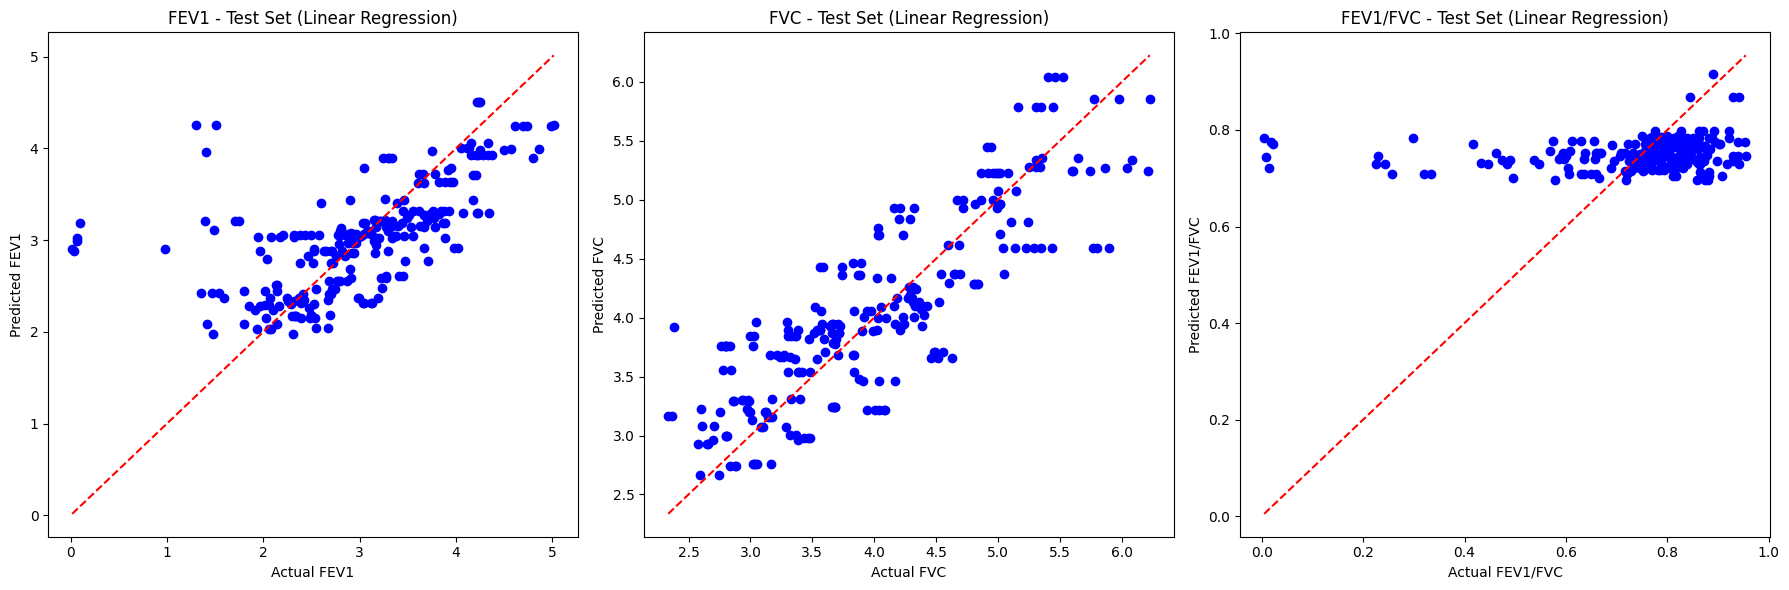

In [17]:
# This section uses a linear regression algorithm to predict
# FEV1, FVC, and FEV1/FVC

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create linear regression models for FEV1, FVC, and FEV1/FVC
model_FEV1 = LinearRegression()
model_FVC = LinearRegression()
model_FEV1_FVC = LinearRegression()

# Fit the models to the training data
model_FEV1.fit(X_train, y_train['FEV1'].values.reshape(-1, 1))
model_FVC.fit(X_train, y_train['FVC'].values.reshape(-1, 1))
model_FEV1_FVC.fit(X_train, y_train['FEV1/FVC'].values.reshape(-1, 1))

# Predict on the training data
y_train_pred_FEV1 = model_FEV1.predict(X_train)
y_train_pred_FVC = model_FVC.predict(X_train)
y_train_pred_FEV1_FVC = model_FEV1_FVC.predict(X_train)

# Predict on the test data
y_test_pred_FEV1 = model_FEV1.predict(X_test)
y_test_pred_FVC = model_FVC.predict(X_test)
y_test_pred_FEV1_FVC = model_FEV1_FVC.predict(X_test)

# Evaluate the models
mse_train_FEV1 = mean_squared_error(y_train['FEV1'].values, y_train_pred_FEV1)
rmse_train_FEV1 = np.sqrt(mse_train_FEV1)

mse_train_FVC = mean_squared_error(y_train['FVC'].values, y_train_pred_FVC)
rmse_train_FVC = np.sqrt(mse_train_FVC)

mse_train_FEV1_FVC = mean_squared_error(y_train['FEV1/FVC'].values, y_train_pred_FEV1_FVC)
rmse_train_FEV1_FVC = np.sqrt(mse_train_FEV1_FVC)

# Display results for training set
print("Training Set Evaluation:")
print("FEV1 - MSE: {}, RMSE: {}".format(mse_train_FEV1, rmse_train_FEV1))
print("FVC - MSE: {}, RMSE: {}".format(mse_train_FVC, rmse_train_FVC))
print("FEV1/FVC - MSE: {}, RMSE: {}".format(mse_train_FEV1_FVC, rmse_train_FEV1_FVC))

# Evaluate the models on the test set
mse_test_FEV1 = mean_squared_error(y_test['FEV1'].values, y_test_pred_FEV1)
rmse_test_FEV1 = np.sqrt(mse_test_FEV1)

mse_test_FVC = mean_squared_error(y_test['FVC'].values, y_test_pred_FVC)
rmse_test_FVC = np.sqrt(mse_test_FVC)

mse_test_FEV1_FVC = mean_squared_error(y_test['FEV1/FVC'].values, y_test_pred_FEV1_FVC)
rmse_test_FEV1_FVC = np.sqrt(mse_test_FEV1_FVC)

# Display results for the test set
print("\nTest Set Evaluation:")
print("FEV1 - MSE: {}, RMSE: {}".format(mse_test_FEV1, rmse_test_FEV1))
print("FVC - MSE: {}, RMSE: {}".format(mse_test_FVC, rmse_test_FVC))
print("FEV1/FVC - MSE: {}, RMSE: {}".format(mse_test_FEV1_FVC, rmse_test_FEV1_FVC))

# Plot test set
plt.figure(figsize=(18, 6))

# Plot for FEV1
plt.subplot(1, 3, 1)
plt.scatter(y_test['FEV1'].values, y_test_pred_FEV1, color='blue')
plt.plot([y_test['FEV1'].values.min(), y_test['FEV1'].values.max()], [y_test['FEV1'].values.min(), y_test['FEV1'].values.max()], linestyle='--', color='red')
plt.title('FEV1 - Test Set (Linear Regression)')
plt.xlabel('Actual FEV1')
plt.ylabel('Predicted FEV1')

# Plot for FVC
plt.subplot(1, 3, 2)
plt.scatter(y_test['FVC'].values, y_test_pred_FVC, color='blue')
plt.plot([y_test['FVC'].values.min(), y_test['FVC'].values.max()], [y_test['FVC'].values.min(), y_test['FVC'].values.max()], linestyle='--', color='red')
plt.title('FVC - Test Set (Linear Regression)')
plt.xlabel('Actual FVC')
plt.ylabel('Predicted FVC')

# Plot for FEV1/FVC
plt.subplot(1, 3, 3)
plt.scatter(y_test['FEV1/FVC'].values, y_test_pred_FEV1_FVC, color='blue')
plt.plot([y_test['FEV1/FVC'].values.min(), y_test['FEV1/FVC'].values.max()], [y_test['FEV1/FVC'].values.min(), y_test['FEV1/FVC'].values.max()], linestyle='--', color='red')
plt.title('FEV1/FVC - Test Set (Linear Regression)')
plt.xlabel('Actual FEV1/FVC')
plt.ylabel('Predicted FEV1/FVC')

plt.tight_layout()
plt.show()

Training Set Evaluation:
FEV1 - MSE: 0.4803346460229036, RMSE: 0.6930617909125445
FVC - MSE: 0.2357441735336319, RMSE: 0.48553493544093396
FEV1/FVC - MSE: 0.022028834176892973, RMSE: 0.14842113790458883

Test Set Evaluation:
FEV1 - MSE: 0.5507854431673127, RMSE: 0.7421492054616192
FVC - MSE: 0.22050092930864995, RMSE: 0.4695752647964434
FEV1/FVC - MSE: 0.027718052526578916, RMSE: 0.16648739449753822


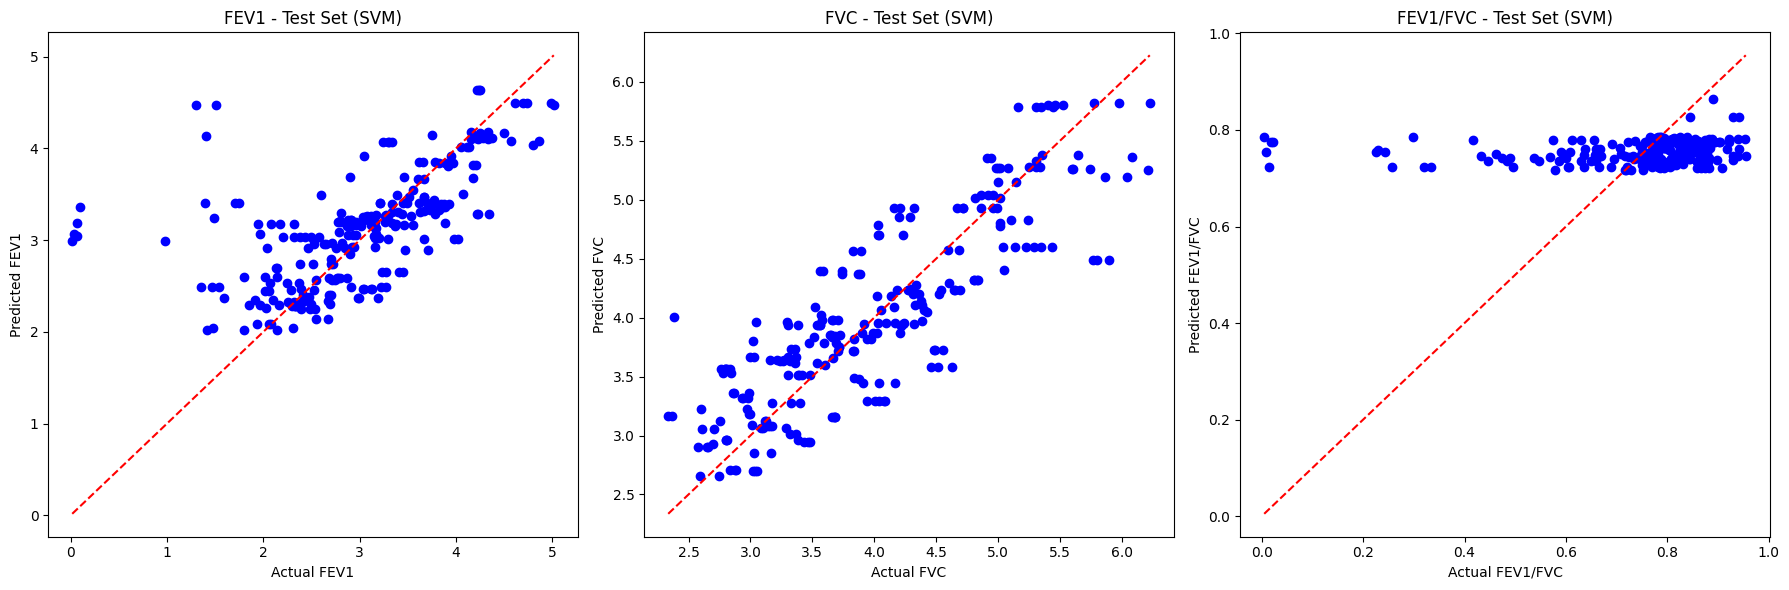

In [18]:
# This section uses an SVM algorithm to predict
# FEV1, FVC, and FEV1/FVC

from sklearn.svm import SVR

# Create SVM models for FEV1, FVC, and FEV1/FVC
model_FEV1 = SVR(kernel='linear')
model_FVC = SVR(kernel='linear')
model_FEV1_FVC = SVR(kernel='linear')

# Fit the models to the training data
model_FEV1.fit(X_train, y_train['FEV1'])
model_FVC.fit(X_train, y_train['FVC'])
model_FEV1_FVC.fit(X_train, y_train['FEV1/FVC'])

# Predict on the training data
y_train_pred_FEV1 = model_FEV1.predict(X_train)
y_train_pred_FVC = model_FVC.predict(X_train)
y_train_pred_FEV1_FVC = model_FEV1_FVC.predict(X_train)

# Predict on the test data
y_test_pred_FEV1 = model_FEV1.predict(X_test)
y_test_pred_FVC = model_FVC.predict(X_test)
y_test_pred_FEV1_FVC = model_FEV1_FVC.predict(X_test)

# Evaluate the models on the training set
mse_train_FEV1 = mean_squared_error(y_train['FEV1'], y_train_pred_FEV1)
rmse_train_FEV1 = np.sqrt(mse_train_FEV1)

mse_train_FVC = mean_squared_error(y_train['FVC'], y_train_pred_FVC)
rmse_train_FVC = np.sqrt(mse_train_FVC)

mse_train_FEV1_FVC = mean_squared_error(y_train['FEV1/FVC'], y_train_pred_FEV1_FVC)
rmse_train_FEV1_FVC = np.sqrt(mse_train_FEV1_FVC)

# Display results for training set
print("Training Set Evaluation:")
print("FEV1 - MSE: {}, RMSE: {}".format(mse_train_FEV1, rmse_train_FEV1))
print("FVC - MSE: {}, RMSE: {}".format(mse_train_FVC, rmse_train_FVC))
print("FEV1/FVC - MSE: {}, RMSE: {}".format(mse_train_FEV1_FVC, rmse_train_FEV1_FVC))

# Evaluate the models on the test set
mse_test_FEV1 = mean_squared_error(y_test['FEV1'], y_test_pred_FEV1)
rmse_test_FEV1 = np.sqrt(mse_test_FEV1)

mse_test_FVC = mean_squared_error(y_test['FVC'], y_test_pred_FVC)
rmse_test_FVC = np.sqrt(mse_test_FVC)

mse_test_FEV1_FVC = mean_squared_error(y_test['FEV1/FVC'], y_test_pred_FEV1_FVC)
rmse_test_FEV1_FVC = np.sqrt(mse_test_FEV1_FVC)

# Display results for the test set
print("\nTest Set Evaluation:")
print("FEV1 - MSE: {}, RMSE: {}".format(mse_test_FEV1, rmse_test_FEV1))
print("FVC - MSE: {}, RMSE: {}".format(mse_test_FVC, rmse_test_FVC))
print("FEV1/FVC - MSE: {}, RMSE: {}".format(mse_test_FEV1_FVC, rmse_test_FEV1_FVC))

# Plot test set
plt.figure(figsize=(18, 6))

# Plot for FEV1
plt.subplot(1, 3, 1)
plt.scatter(y_test['FEV1'].values, y_test_pred_FEV1, color='blue')
plt.plot([y_test['FEV1'].values.min(), y_test['FEV1'].values.max()], [y_test['FEV1'].values.min(), y_test['FEV1'].values.max()], linestyle='--', color='red')
plt.title('FEV1 - Test Set (SVM)')
plt.xlabel('Actual FEV1')
plt.ylabel('Predicted FEV1')

# Plot for FVC
plt.subplot(1, 3, 2)
plt.scatter(y_test['FVC'].values, y_test_pred_FVC, color='blue')
plt.plot([y_test['FVC'].values.min(), y_test['FVC'].values.max()], [y_test['FVC'].values.min(), y_test['FVC'].values.max()], linestyle='--', color='red')
plt.title('FVC - Test Set (SVM)')
plt.xlabel('Actual FVC')
plt.ylabel('Predicted FVC')

# Plot for FEV1/FVC
plt.subplot(1, 3, 3)
plt.scatter(y_test['FEV1/FVC'].values, y_test_pred_FEV1_FVC, color='blue')
plt.plot([y_test['FEV1/FVC'].values.min(), y_test['FEV1/FVC'].values.max()], [y_test['FEV1/FVC'].values.min(), y_test['FEV1/FVC'].values.max()], linestyle='--', color='red')
plt.title('FEV1/FVC - Test Set (SVM)')
plt.xlabel('Actual FEV1/FVC')
plt.ylabel('Predicted FEV1/FVC')

plt.tight_layout()
plt.show()

Training Set Evaluation:
FEV1 - MSE: 0.27786716111645665, RMSE: 0.5271310663549025
FVC - MSE: 0.03822782096937923, RMSE: 0.19551936213423782
FEV1/FVC - MSE: 0.013620057096959019, RMSE: 0.11670500030829449

Test Set Evaluation:
FEV1 - MSE: 0.3182812268315094, RMSE: 0.5641641842863737
FVC - MSE: 0.02901752564904876, RMSE: 0.17034531296472105
FEV1/FVC - MSE: 0.019022787143314266, RMSE: 0.13792312040885046


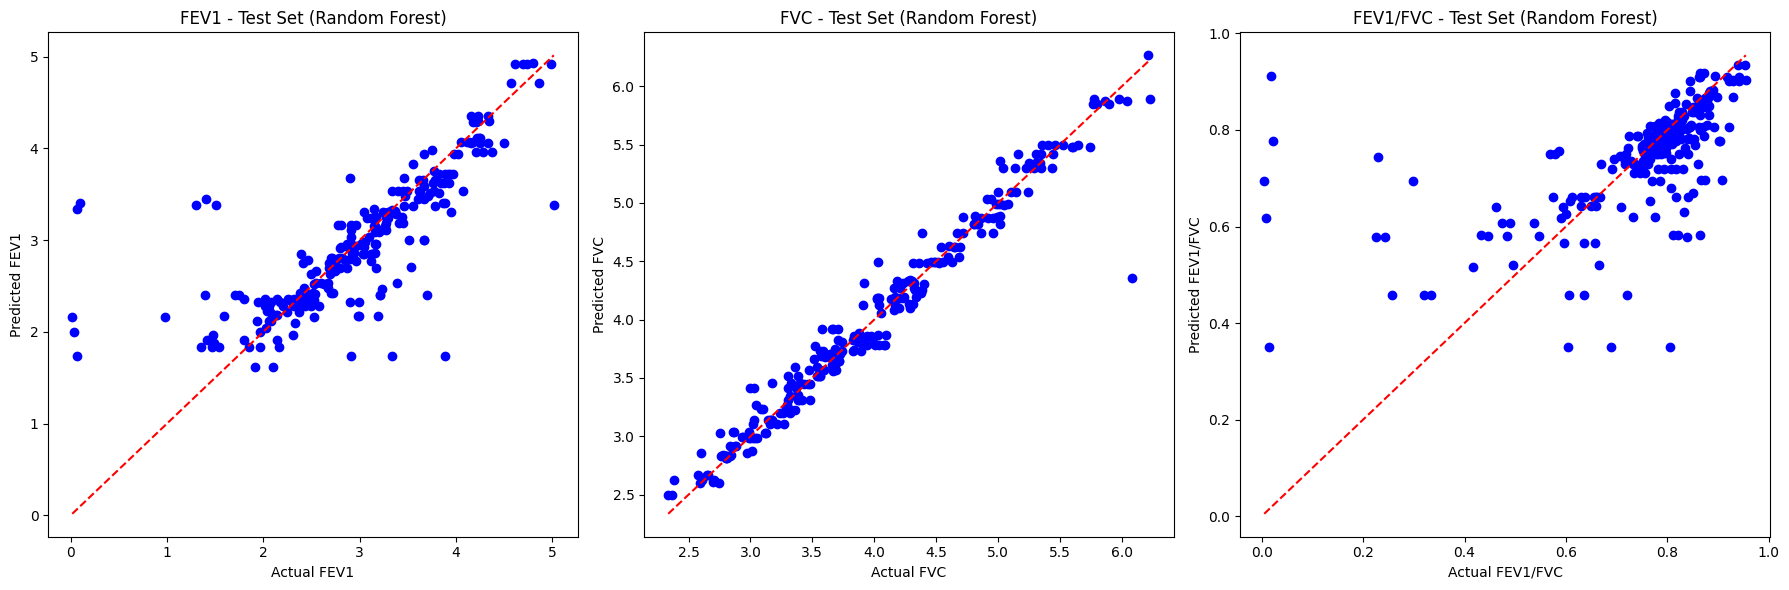

In [19]:
# This section uses a Random Forest algorithm to predict
# FEV1, FVC, and FEV1/FVC

from sklearn.ensemble import RandomForestRegressor

# Create Random Forest models for FEV1, FVC, and FEV1/FVC
model_FEV1 = RandomForestRegressor()
model_FVC = RandomForestRegressor()
model_FEV1_FVC = RandomForestRegressor()

# Fit the models to the training data
model_FEV1.fit(X_train, y_train['FEV1'])
model_FVC.fit(X_train, y_train['FVC'])
model_FEV1_FVC.fit(X_train, y_train['FEV1/FVC'])

# Predict on the training data
y_train_pred_FEV1 = model_FEV1.predict(X_train)
y_train_pred_FVC = model_FVC.predict(X_train)
y_train_pred_FEV1_FVC = model_FEV1_FVC.predict(X_train)

# Predict on the test data
y_test_pred_FEV1 = model_FEV1.predict(X_test)
y_test_pred_FVC = model_FVC.predict(X_test)
y_test_pred_FEV1_FVC = model_FEV1_FVC.predict(X_test)

# Evaluate the models on the training set
mse_train_FEV1 = mean_squared_error(y_train['FEV1'], y_train_pred_FEV1)
rmse_train_FEV1 = np.sqrt(mse_train_FEV1)

mse_train_FVC = mean_squared_error(y_train['FVC'], y_train_pred_FVC)
rmse_train_FVC = np.sqrt(mse_train_FVC)

mse_train_FEV1_FVC = mean_squared_error(y_train['FEV1/FVC'], y_train_pred_FEV1_FVC)
rmse_train_FEV1_FVC = np.sqrt(mse_train_FEV1_FVC)

# Display results for training set
print("Training Set Evaluation:")
print("FEV1 - MSE: {}, RMSE: {}".format(mse_train_FEV1, rmse_train_FEV1))
print("FVC - MSE: {}, RMSE: {}".format(mse_train_FVC, rmse_train_FVC))
print("FEV1/FVC - MSE: {}, RMSE: {}".format(mse_train_FEV1_FVC, rmse_train_FEV1_FVC))

# Evaluate the models on the test set
mse_test_FEV1 = mean_squared_error(y_test['FEV1'], y_test_pred_FEV1)
rmse_test_FEV1 = np.sqrt(mse_test_FEV1)

mse_test_FVC = mean_squared_error(y_test['FVC'], y_test_pred_FVC)
rmse_test_FVC = np.sqrt(mse_test_FVC)

mse_test_FEV1_FVC = mean_squared_error(y_test['FEV1/FVC'], y_test_pred_FEV1_FVC)
rmse_test_FEV1_FVC = np.sqrt(mse_test_FEV1_FVC)

# Display results for the test set
print("\nTest Set Evaluation:")
print("FEV1 - MSE: {}, RMSE: {}".format(mse_test_FEV1, rmse_test_FEV1))
print("FVC - MSE: {}, RMSE: {}".format(mse_test_FVC, rmse_test_FVC))
print("FEV1/FVC - MSE: {}, RMSE: {}".format(mse_test_FEV1_FVC, rmse_test_FEV1_FVC))

# Plot test set
plt.figure(figsize=(18, 6))

# Plot for FEV1
plt.subplot(1, 3, 1)
plt.scatter(y_test['FEV1'].values, y_test_pred_FEV1, color='blue')
plt.plot([y_test['FEV1'].values.min(), y_test['FEV1'].values.max()], [y_test['FEV1'].values.min(), y_test['FEV1'].values.max()], linestyle='--', color='red')
plt.title('FEV1 - Test Set (Random Forest)')
plt.xlabel('Actual FEV1')
plt.ylabel('Predicted FEV1')

# Plot for FVC
plt.subplot(1, 3, 2)
plt.scatter(y_test['FVC'].values, y_test_pred_FVC, color='blue')
plt.plot([y_test['FVC'].values.min(), y_test['FVC'].values.max()], [y_test['FVC'].values.min(), y_test['FVC'].values.max()], linestyle='--', color='red')
plt.title('FVC - Test Set (Random Forest)')
plt.xlabel('Actual FVC')
plt.ylabel('Predicted FVC')

# Plot for FEV1/FVC
plt.subplot(1, 3, 3)
plt.scatter(y_test['FEV1/FVC'].values, y_test_pred_FEV1_FVC, color='blue')
plt.plot([y_test['FEV1/FVC'].values.min(), y_test['FEV1/FVC'].values.max()], [y_test['FEV1/FVC'].values.min(), y_test['FEV1/FVC'].values.max()], linestyle='--', color='red')
plt.title('FEV1/FVC - Test Set (Random Forest)')
plt.xlabel('Actual FEV1/FVC')
plt.ylabel('Predicted FEV1/FVC')

plt.tight_layout()
plt.show()

Training Set Evaluation:
FEV1 - MSE: 0.2772143093012271, RMSE: 0.5265114522032993
FVC - MSE: 0.038003221698170664, RMSE: 0.19494415020248917
FEV1/FVC - MSE: 0.013596467826988529, RMSE: 0.11660389284663068

Test Set Evaluation:
FEV1 - MSE: 0.32015373898533167, RMSE: 0.5658212959807466
FVC - MSE: 0.028005602491812876, RMSE: 0.16734874511573988
FEV1/FVC - MSE: 0.01907343645687553, RMSE: 0.13810661264717025


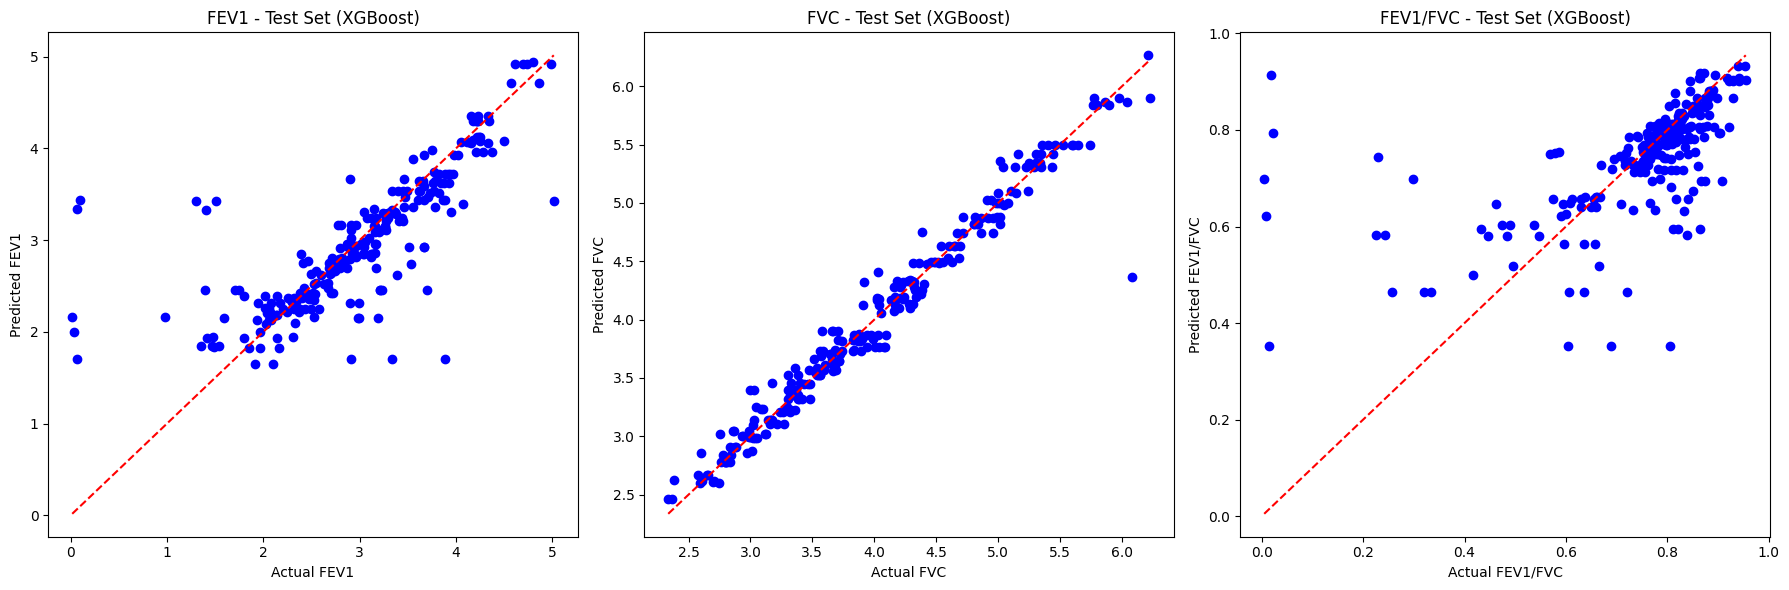

In [23]:
## This section uses an XGBoost algorithm to predict
# FEV1, FVC, and FEV1/FVC

from xgboost import XGBRegressor

# Create XGBoost models for FEV1, FVC, and FEV1/FVC
model_FEV1 = XGBRegressor(objective='reg:squarederror')
model_FVC = XGBRegressor(objective='reg:squarederror')
model_FEV1_FVC = XGBRegressor(objective='reg:squarederror')

# Fit the models to the training data
model_FEV1.fit(X_train, y_train['FEV1'])
model_FVC.fit(X_train, y_train['FVC'])
model_FEV1_FVC.fit(X_train, y_train['FEV1/FVC'])

# Predict on the training data
y_train_pred_FEV1 = model_FEV1.predict(X_train)
y_train_pred_FVC = model_FVC.predict(X_train)
y_train_pred_FEV1_FVC = model_FEV1_FVC.predict(X_train)

# Evaluate the models on the training set
mse_train_FEV1 = mean_squared_error(y_train['FEV1'], y_train_pred_FEV1)
rmse_train_FEV1 = np.sqrt(mse_train_FEV1)

mse_train_FVC = mean_squared_error(y_train['FVC'], y_train_pred_FVC)
rmse_train_FVC = np.sqrt(mse_train_FVC)

mse_train_FEV1_FVC = mean_squared_error(y_train['FEV1/FVC'], y_train_pred_FEV1_FVC)
rmse_train_FEV1_FVC = np.sqrt(mse_train_FEV1_FVC)

# Display results for the training set
print("Training Set Evaluation:")
print("FEV1 - MSE: {}, RMSE: {}".format(mse_train_FEV1, rmse_train_FEV1))
print("FVC - MSE: {}, RMSE: {}".format(mse_train_FVC, rmse_train_FVC))
print("FEV1/FVC - MSE: {}, RMSE: {}".format(mse_train_FEV1_FVC, rmse_train_FEV1_FVC))

# Evaluate the models on the test set
mse_test_FEV1 = mean_squared_error(y_test['FEV1'], y_test_pred_FEV1)
rmse_test_FEV1 = np.sqrt(mse_test_FEV1)

mse_test_FVC = mean_squared_error(y_test['FVC'], y_test_pred_FVC)
rmse_test_FVC = np.sqrt(mse_test_FVC)

mse_test_FEV1_FVC = mean_squared_error(y_test['FEV1/FVC'], y_test_pred_FEV1_FVC)
rmse_test_FEV1_FVC = np.sqrt(mse_test_FEV1_FVC)

# Display results for the test set
print("\nTest Set Evaluation:")
print("FEV1 - MSE: {}, RMSE: {}".format(mse_test_FEV1, rmse_test_FEV1))
print("FVC - MSE: {}, RMSE: {}".format(mse_test_FVC, rmse_test_FVC))
print("FEV1/FVC - MSE: {}, RMSE: {}".format(mse_test_FEV1_FVC, rmse_test_FEV1_FVC))

# Plot test set results
plt.figure(figsize=(18, 6))

# FEV1 Plot
plt.subplot(1, 3, 1)
plt.scatter(y_test['FEV1'].values, y_test_pred_FEV1, color='blue')
plt.plot([y_test['FEV1'].min(), y_test['FEV1'].max()], [y_test['FEV1'].min(), y_test['FEV1'].max()], linestyle='--', color='red')
plt.title('FEV1 - Test Set (XGBoost)')
plt.xlabel('Actual FEV1')
plt.ylabel('Predicted FEV1')

# FVC Plot
plt.subplot(1, 3, 2)
plt.scatter(y_test['FVC'].values, y_test_pred_FVC, color='blue')
plt.plot([y_test['FVC'].min(), y_test['FVC'].max()], [y_test['FVC'].min(), y_test['FVC'].max()], linestyle='--', color='red')
plt.title('FVC - Test Set (XGBoost)')
plt.xlabel('Actual FVC')
plt.ylabel('Predicted FVC')

# FEV1/FVC Plot
plt.subplot(1, 3, 3)
plt.scatter(y_test['FEV1/FVC'].values, y_test_pred_FEV1_FVC, color='blue')
plt.plot([y_test['FEV1/FVC'].min(), y_test['FEV1/FVC'].max()], [y_test['FEV1/FVC'].min(), y_test['FEV1/FVC'].max()], linestyle='--', color='red')
plt.title('FEV1/FVC - Test Set (XGBoost)')
plt.xlabel('Actual FEV1/FVC')
plt.ylabel('Predicted FEV1/FVC')

plt.tight_layout()
plt.show()



FEV1 - Tuned Random Forest
Training MSE: 0.2807041732655487 RMSE: 0.5298152255886468
Test MSE: 0.3136719964175421 RMSE: 0.5600642788265845

FVC - Tuned Random Forest
Training MSE: 0.03835173436235638 RMSE: 0.19583598842489697
Test MSE: 0.028443842695087276 RMSE: 0.16865302456548853

FEV1/FVC - Tuned Random Forest
Training MSE: 0.013693037413240208 RMSE: 0.11701725263071343
Test MSE: 0.018983096046576192 RMSE: 0.1377791567929496

Best hyperparameters for FEV1: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Best hyperparameters for FVC: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 150}
Best hyperparameters for FEV1/FVC: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}


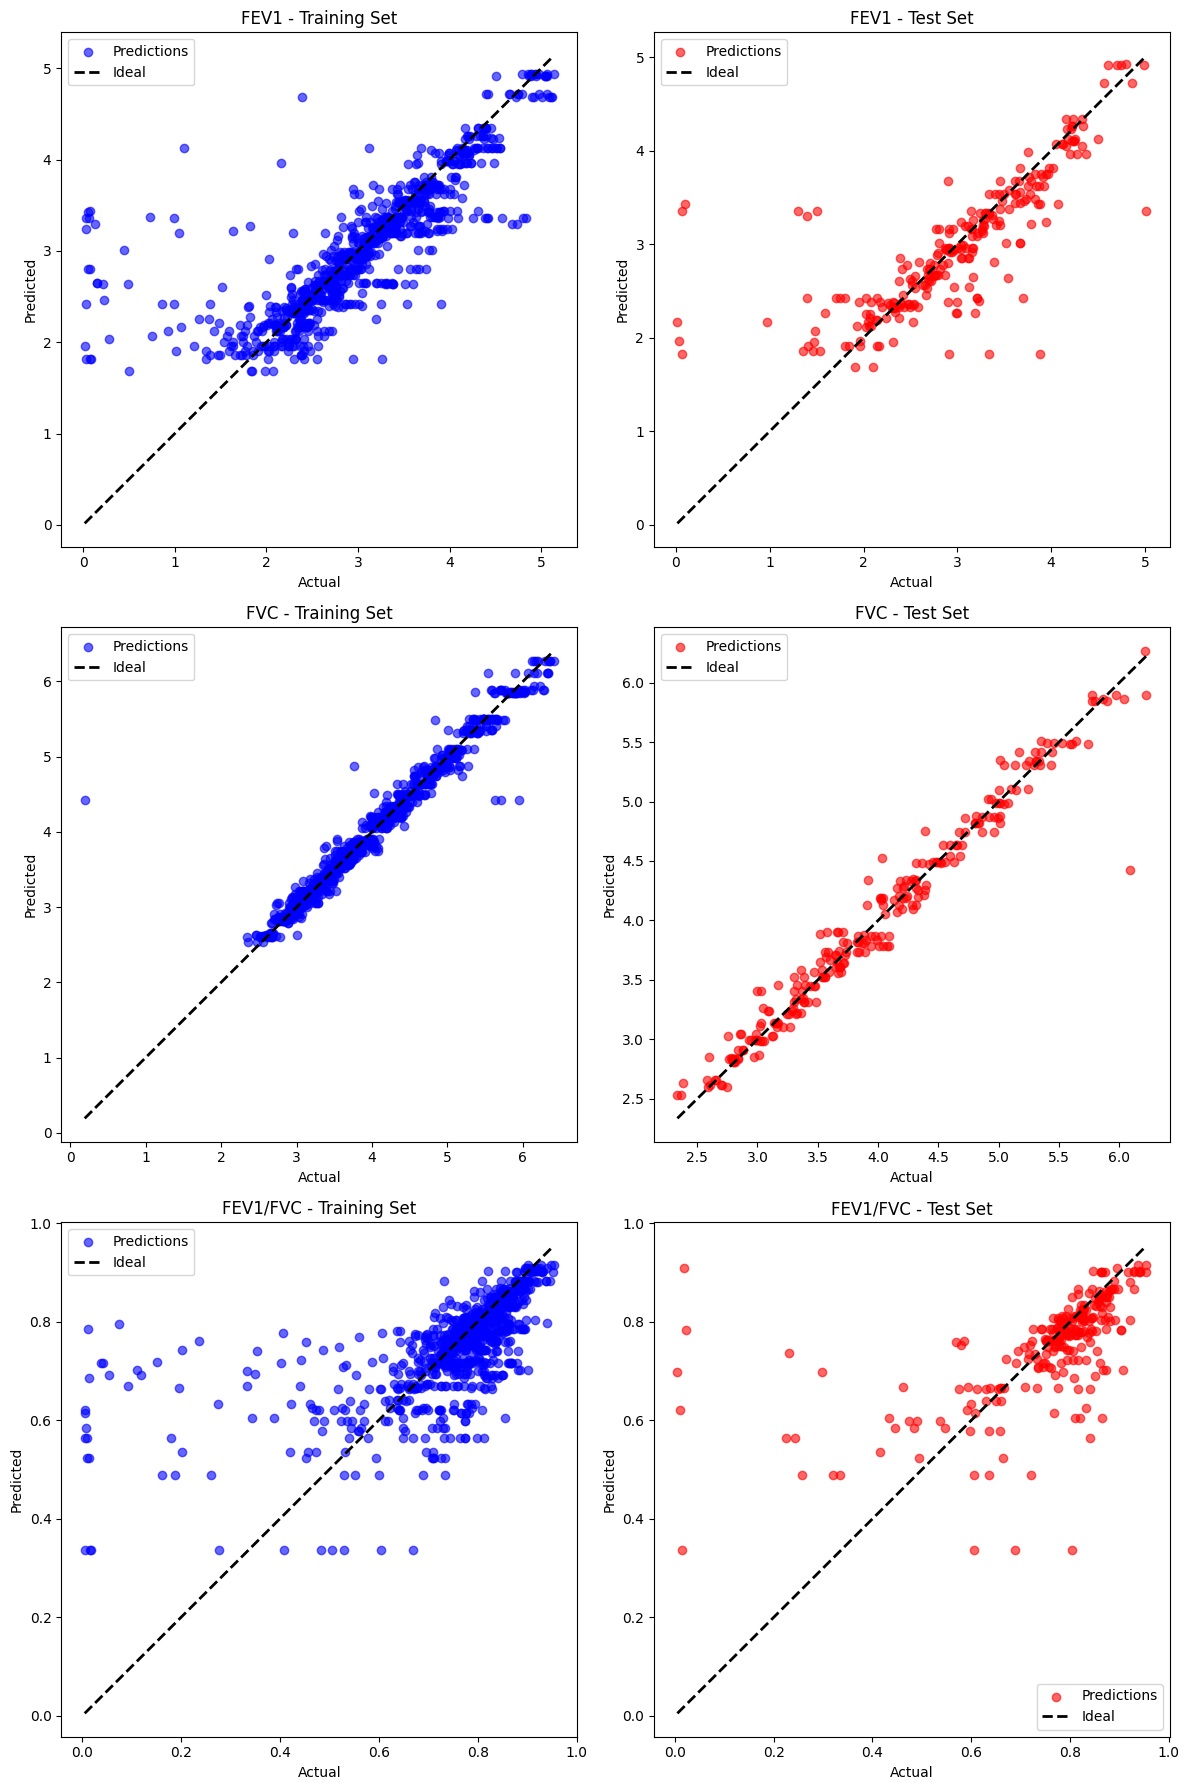

In [25]:
# This section performs hyperparameter tuning with use of a 5-fold
# cross validation and GridSearchCV with reporting of MSE and RMSE
# for the Random Forest algorithm

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create Random Forest regression models for FEV1, FVC, and FEV1/FVC
model_FEV1_rf = RandomForestRegressor()
model_FVC_rf = RandomForestRegressor()
model_FEV1_FVC_rf = RandomForestRegressor()

# Perform GridSearchCV for FEV1
grid_search_FEV1 = GridSearchCV(model_FEV1_rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_FEV1.fit(X_train, y_train['FEV1'])

# Get the best hyperparameters for FEV1
best_params_FEV1 = grid_search_FEV1.best_params_

# Perform GridSearchCV for FVC
grid_search_FVC = GridSearchCV(model_FVC_rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_FVC.fit(X_train, y_train['FVC'])

# Get the best hyperparameters for FVC
best_params_FVC = grid_search_FVC.best_params_

# Perform GridSearchCV for FEV1/FVC
grid_search_FEV1_FVC = GridSearchCV(model_FEV1_FVC_rf, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_FEV1_FVC.fit(X_train, y_train['FEV1/FVC'])

# Get the best hyperparameters for FEV1/FVC
best_params_FEV1_FVC = grid_search_FEV1_FVC.best_params_

# Create new models with the best hyperparameters
model_FEV1_rf_tuned = RandomForestRegressor(**best_params_FEV1)
model_FVC_rf_tuned = RandomForestRegressor(**best_params_FVC)
model_FEV1_FVC_rf_tuned = RandomForestRegressor(**best_params_FEV1_FVC)

# Fit the tuned models to the training data
model_FEV1_rf_tuned.fit(X_train, y_train['FEV1'])
model_FVC_rf_tuned.fit(X_train, y_train['FVC'])
model_FEV1_FVC_rf_tuned.fit(X_train, y_train['FEV1/FVC'])

# Evaluate and print results for FEV1
mse_FEV1_rf_tuned_train = mean_squared_error(y_train['FEV1'], model_FEV1_rf_tuned.predict(X_train))
mse_FEV1_rf_tuned_test = mean_squared_error(y_test['FEV1'], model_FEV1_rf_tuned.predict(X_test))
print("\nFEV1 - Tuned Random Forest")
print("Training MSE:", mse_FEV1_rf_tuned_train, "RMSE:", np.sqrt(mse_FEV1_rf_tuned_train))
print("Test MSE:", mse_FEV1_rf_tuned_test, "RMSE:", np.sqrt(mse_FEV1_rf_tuned_test))

# Evaluate and print results for FVC
mse_FVC_rf_tuned_train = mean_squared_error(y_train['FVC'], model_FVC_rf_tuned.predict(X_train))
mse_FVC_rf_tuned_test = mean_squared_error(y_test['FVC'], model_FVC_rf_tuned.predict(X_test))
print("\nFVC - Tuned Random Forest")
print("Training MSE:", mse_FVC_rf_tuned_train, "RMSE:", np.sqrt(mse_FVC_rf_tuned_train))
print("Test MSE:", mse_FVC_rf_tuned_test, "RMSE:", np.sqrt(mse_FVC_rf_tuned_test))

# Evaluate and print results for FEV1/FVC
mse_FEV1_FVC_rf_tuned_train = mean_squared_error(y_train['FEV1/FVC'], model_FEV1_FVC_rf_tuned.predict(X_train))
mse_FEV1_FVC_rf_tuned_test = mean_squared_error(y_test['FEV1/FVC'], model_FEV1_FVC_rf_tuned.predict(X_test))
print("\nFEV1/FVC - Tuned Random Forest")
print("Training MSE:", mse_FEV1_FVC_rf_tuned_train, "RMSE:", np.sqrt(mse_FEV1_FVC_rf_tuned_train))
print("Test MSE:", mse_FEV1_FVC_rf_tuned_test, "RMSE:", np.sqrt(mse_FEV1_FVC_rf_tuned_test))

# Print the best hyperparameters
print("\nBest hyperparameters for FEV1:", best_params_FEV1)
print("Best hyperparameters for FVC:", best_params_FVC)
print("Best hyperparameters for FEV1/FVC:", best_params_FEV1_FVC)

# Plot test set results for FEV1, FVC, and FEV1/FVC
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
axes = axes.ravel()

targets = ['FEV1', 'FVC', 'FEV1/FVC']
predictions_train = [model_FEV1_rf_tuned.predict(X_train), model_FVC_rf_tuned.predict(X_train), model_FEV1_FVC_rf_tuned.predict(X_train)]
predictions_test = [model_FEV1_rf_tuned.predict(X_test), model_FVC_rf_tuned.predict(X_test), model_FEV1_FVC_rf_tuned.predict(X_test)]

for i, target in enumerate(targets):
    # Training set plots
    axes[i*2].scatter(y_train[target], predictions_train[i], color='blue', alpha=0.6, label='Predictions')
    axes[i*2].plot([y_train[target].min(), y_train[target].max()], [y_train[target].min(), y_train[target].max()], 'k--', lw=2, label='Ideal')
    axes[i*2].set_title(f'{target} - Training Set')
    axes[i*2].set_xlabel('Actual')
    axes[i*2].set_ylabel('Predicted')
    axes[i*2].legend()

    # Test set plots
    axes[i*2+1].scatter(y_test[target], predictions_test[i], color='red', alpha=0.6, label='Predictions')
    axes[i*2+1].plot([y_test[target].min(), y_test[target].max()], [y_test[target].min(), y_test[target].max()], 'k--', lw=2, label='Ideal')
    axes[i*2+1].set_title(f'{target} - Test Set')
    axes[i*2+1].set_xlabel('Actual')
    axes[i*2+1].set_ylabel('Predicted')
    axes[i*2+1].legend()

plt.tight_layout()
plt.show()

Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best hyperparameters for FEV1: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best hyperparameters for FVC: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 150, 'subsample': 0.7}
Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best hyperparameters for FEV1/FVC: {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 150, 'subsample': 0.8}

FEV1 - Training MSE: 0.2913692686350237, RMSE: 0.5397863175692986
FEV1 - Test MSE: 0.3283850644664434, RMSE: 0.5730489197847278

FVC - Training MSE: 0.03860287429663939, RMSE: 0.19647614180006537
FVC - Test MSE: 0.024303121977333256, RMSE: 0.15589458610655232

FEV1/FVC - Training MSE: 0.014814033527068156, RMSE: 0.12171291438080084
FEV1/FVC - Test MSE: 0.019315850580451183, RMSE: 0.1389814756737429


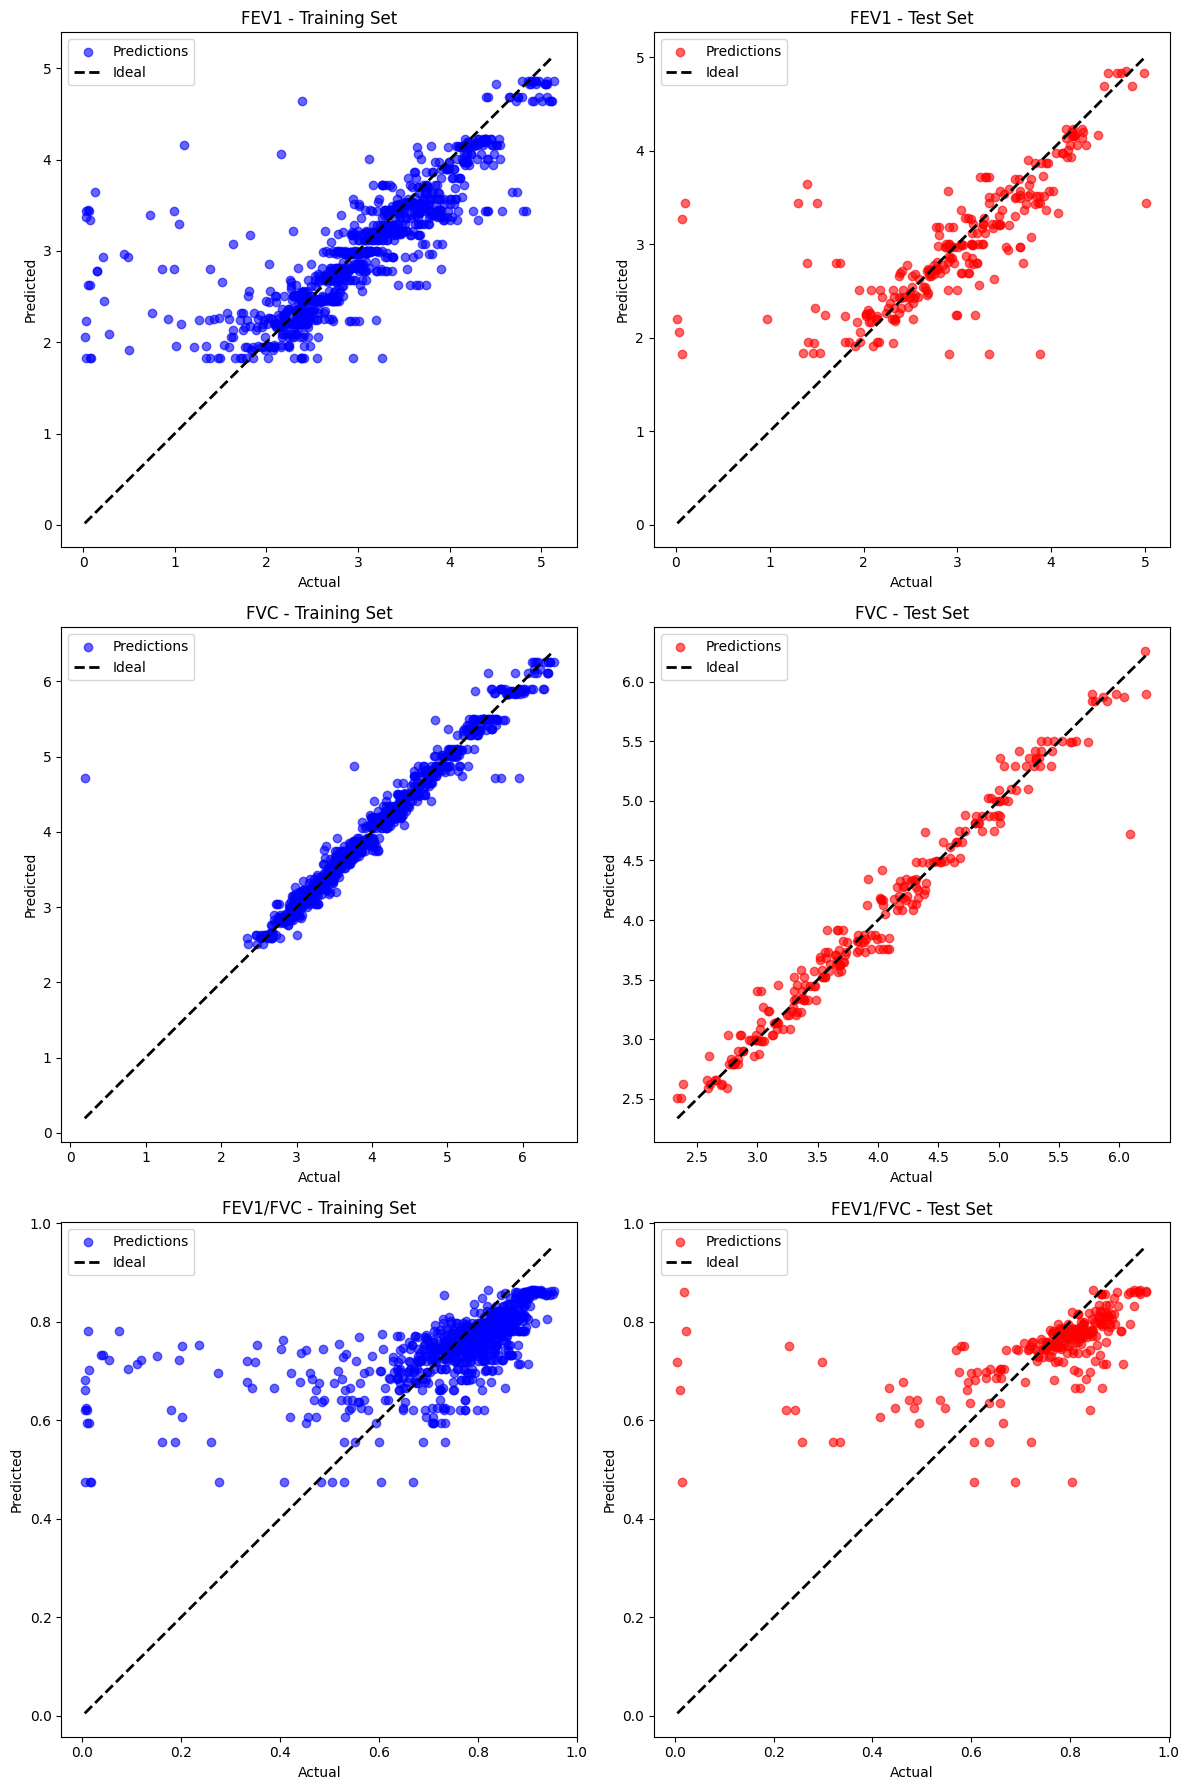

In [184]:
# This section performs hyperparameter tuning with use of a 5-fold
# cross validation and GridSearchCV with reporting of MSE and RMSE
# for the XGBoost algorithm

# Define the hyperparameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}

# Initialize XGBoost regression models for FEV1, FVC, and FEV1/FVC
models = {
    'FEV1': XGBRegressor(),
    'FVC': XGBRegressor(),
    'FEV1/FVC': XGBRegressor()
}

best_params = {}

# Perform GridSearchCV for each target
for target in models:
    grid_search = GridSearchCV(models[target], param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
    grid_search.fit(X_train, y_train[target])

    # Get and print the best hyperparameters
    best_params[target] = grid_search.best_params_
    print(f"\nBest hyperparameters for {target}:", best_params[target])

    # Update the model with the best parameters
    models[target] = XGBRegressor(**best_params[target])
    models[target].fit(X_train, y_train[target])

# Plotting results for FEV1, FVC, and FEV1/FVC
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
axes = axes.ravel()

for i, target in enumerate(models):
    # Training predictions
    y_train_pred = models[target].predict(X_train)
    # Test predictions
    y_test_pred = models[target].predict(X_test)

    # Calculate and print MSE and RMSE
    mse_train = mean_squared_error(y_train[target], y_train_pred)
    mse_test = mean_squared_error(y_test[target], y_test_pred)
    print(f"\n{target} - Training MSE: {mse_train}, RMSE: {np.sqrt(mse_train)}")
    print(f"{target} - Test MSE: {mse_test}, RMSE: {np.sqrt(mse_test)}")

    # Training set plot
    axes[i*2].scatter(y_train[target], y_train_pred, color='blue', alpha=0.6, label='Predictions')
    axes[i*2].plot([y_train[target].min(), y_train[target].max()], [y_train[target].min(), y_train[target].max()], 'k--', lw=2, label='Ideal')
    axes[i*2].set_title(f'{target} - Training Set')
    axes[i*2].set_xlabel('Actual')
    axes[i*2].set_ylabel('Predicted')
    axes[i*2].legend()

    # Test set plot
    axes[i*2+1].scatter(y_test[target], y_test_pred, color='red', alpha=0.6, label='Predictions')
    axes[i*2+1].plot([y_test[target].min(), y_test[target].max()], [y_test[target].min(), y_test[target].max()], 'k--', lw=2, label='Ideal')
    axes[i*2+1].set_title(f'{target} - Test Set')
    axes[i*2+1].set_xlabel('Actual')
    axes[i*2+1].set_ylabel('Predicted')
    axes[i*2+1].legend()

plt.tight_layout()
plt.show()
